In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train_path = '/content/drive/MyDrive/AI/Train'
data_valid_path = '/content/drive/MyDrive/AI/Validation'

In [ ]:
img_width = 256
img_height = 256
batch_size = 32

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 160 files belonging to 2 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['Ô tô', 'Xe máy']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    data_valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


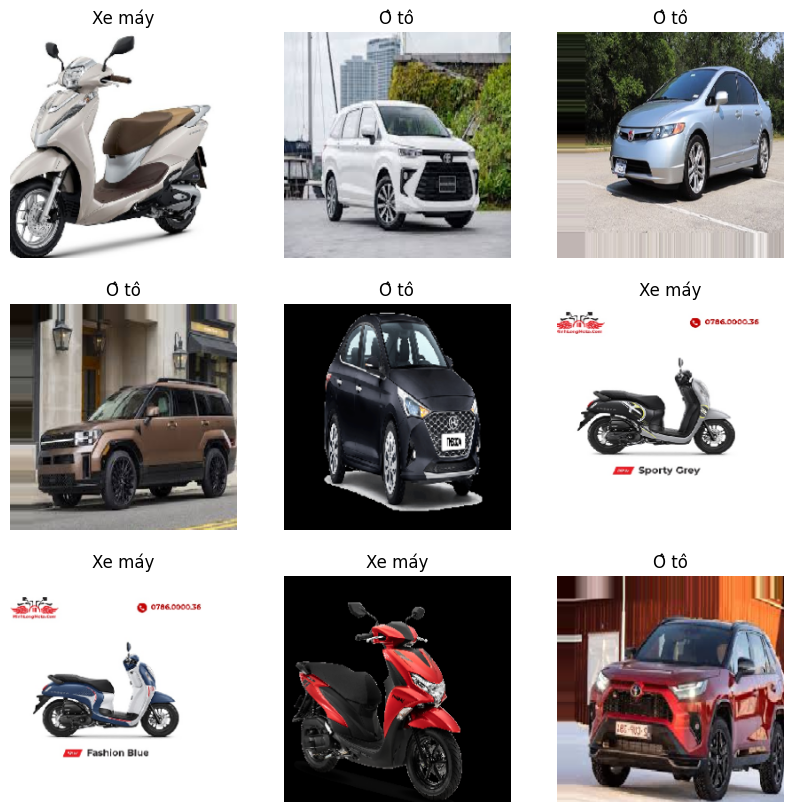

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = train_generator.next()
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    plt.title(data_cat[np.argmax(label)])
    plt.axis('off')

plt.show()

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = tf.keras.models.Sequential()
#lớp CNN1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
#lớp CNN2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
#lớp ra
model.add(Dense(2, activation=tf.nn.softmax))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
steps_per_epoch = len(train_generator)
validation_steps = len(valid_generator)

EPOCHS = 50
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
5/5 [==============================] - 37s 6s/step - loss: 72.1236 - accuracy: 0.5250 - val_loss: 2.4316 - val_accuracy: 0.4750
Epoch 2/50
5/5 [==============================] - 32s 6s/step - loss: 2.8381 - accuracy: 0.4688 - val_loss: 0.5392 - val_accuracy: 0.7500
Epoch 3/50
5/5 [==============================] - 32s 6s/step - loss: 0.8289 - accuracy: 0.5625 - val_loss: 0.4785 - val_accuracy: 0.8250
Epoch 4/50
5/5 [==============================] - 32s 6s/step - loss: 0.5218 - accuracy: 0.7500 - val_loss: 0.4257 - val_accuracy: 0.8250
Epoch 5/50
5/5 [==============================] - 32s 6s/step - loss: 1.0353 - accuracy: 0.6125 - val_loss: 0.4718 - val_accuracy: 0.9000
Epoch 6/50
5/5 [==============================] - 32s 6s/step - loss: 0.5387 - accuracy: 0.7000 - val_loss: 0.5296 - val_accuracy: 0.6500
Epoch 7/50
5/5 [==============================] - 32s 6s/step - loss: 0.4825 - accuracy: 0.7750 - val_loss: 0.3020 - val_accuracy: 0.8500
Epoch 8/50
5/5 [=================

Saving b7e0dbec3ea1862a9c085843c3e1d90f.jpg to b7e0dbec3ea1862a9c085843c3e1d90f (1).jpg
Saving 79f4793f44b7448ef5c4cf74178cefb7.jpg to 79f4793f44b7448ef5c4cf74178cefb7 (1).jpg
Saving a757109bc5d3fd42a92535733b9bbaaa.jpg to a757109bc5d3fd42a92535733b9bbaaa (1).jpg
Saving 40598afe5bfeb6b3e98874d648e11611.jpg to 40598afe5bfeb6b3e98874d648e11611 (1).jpg
Saving c20115187c1d759e58d466f6293adf2f.jpg to c20115187c1d759e58d466f6293adf2f (1).jpg
Saving 1d8f5d9c6aaf17ad395a85e6f8ffd243.jpg to 1d8f5d9c6aaf17ad395a85e6f8ffd243 (1).jpg
Saving 05139e640ca9e615385b294aa43f0164.jpg to 05139e640ca9e615385b294aa43f0164 (1).jpg
Saving a8ff17109521f8d6e37086d04305ddd6.jpg to a8ff17109521f8d6e37086d04305ddd6 (1).jpg
Saving download (1).png to download (1) (1).png
Saving download.png to download (2).png
Saving epNFnKrqwGBz8iJaWhpM.png to epNFnKrqwGBz8iJaWhpM (1).png
Saving uL67srpcKiBCGkqAiy1T.png to uL67srpcKiBCGkqAiy1T (1).png
Saving 511E0fgUO536nhhPIXKq.jpg to 511E0fgUO536nhhPIXKq (1).jpg
Saving yzU6JdMOB

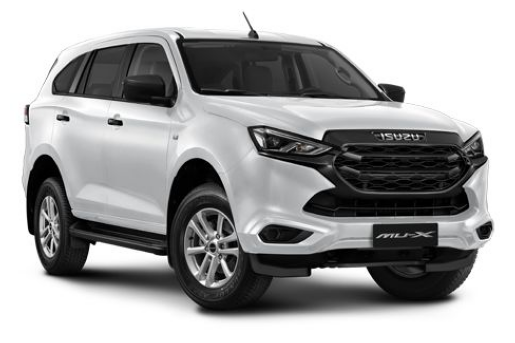

1/1 [==============================] - 0s 164ms/step
Dự đoán: [[0.99128646 0.00871354]]
Giá trị dự đoán: Ô tô
Không vi phạm


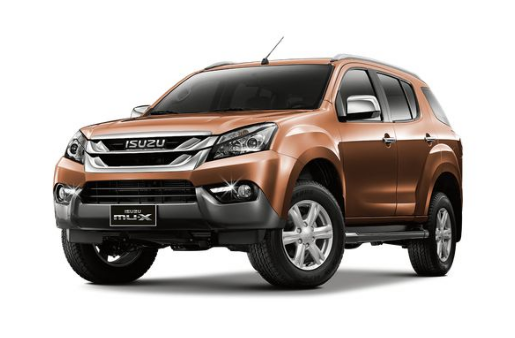

1/1 [==============================] - 0s 84ms/step
Dự đoán: [[0.984359   0.01564097]]
Giá trị dự đoán: Ô tô
Không vi phạm


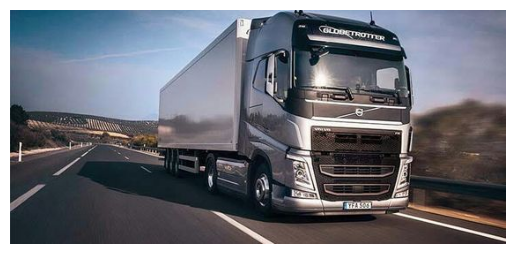

1/1 [==============================] - 0s 85ms/step
Dự đoán: [[0.8044464  0.19555357]]
Giá trị dự đoán: Ô tô
Không vi phạm


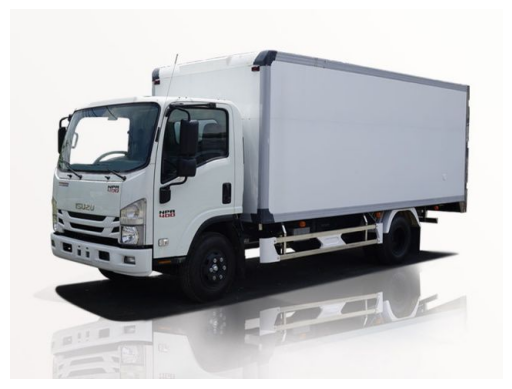

1/1 [==============================] - 0s 85ms/step
Dự đoán: [[0.9003796  0.09962036]]
Giá trị dự đoán: Ô tô
Không vi phạm


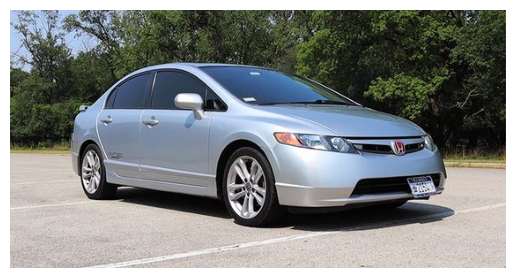

1/1 [==============================] - 0s 90ms/step
Dự đoán: [[9.994004e-01 5.996207e-04]]
Giá trị dự đoán: Ô tô
Không vi phạm


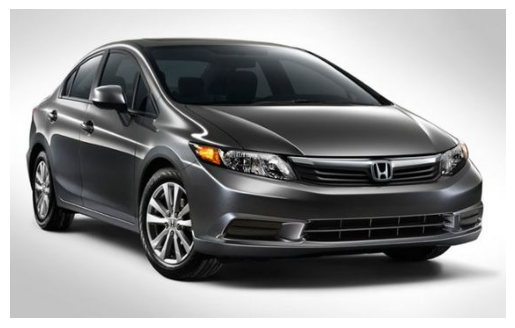

1/1 [==============================] - 0s 92ms/step
Dự đoán: [[0.98928446 0.01071549]]
Giá trị dự đoán: Ô tô
Không vi phạm


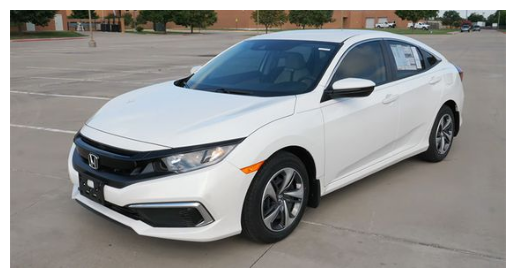

1/1 [==============================] - 0s 99ms/step
Dự đoán: [[0.9965752  0.00342476]]
Giá trị dự đoán: Ô tô
Không vi phạm


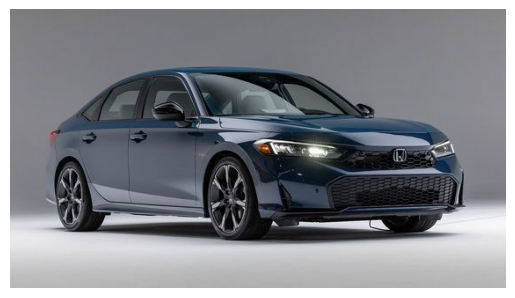

1/1 [==============================] - 0s 92ms/step
Dự đoán: [[0.9505755  0.04942451]]
Giá trị dự đoán: Ô tô
Không vi phạm


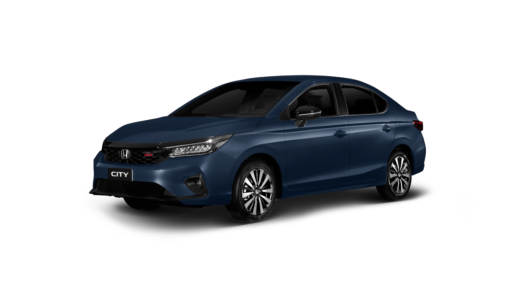

1/1 [==============================] - 0s 86ms/step
Dự đoán: [[0.8529848  0.14701524]]
Giá trị dự đoán: Ô tô
Không vi phạm


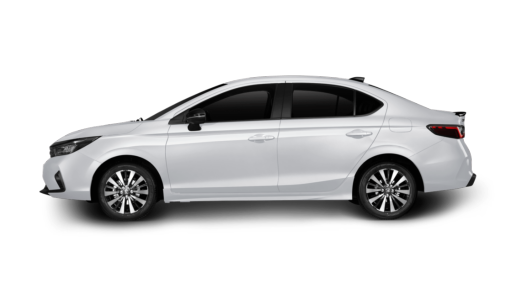

1/1 [==============================] - 0s 120ms/step
Dự đoán: [[0.91114473 0.08885527]]
Giá trị dự đoán: Ô tô
Không vi phạm


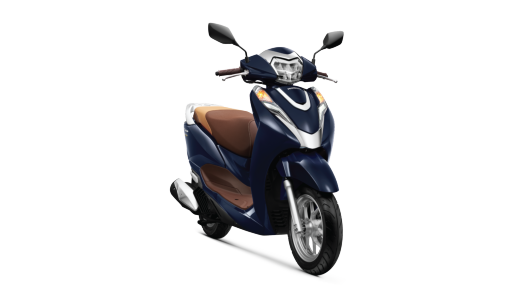

1/1 [==============================] - 0s 121ms/step
Dự đoán: [[0.18611746 0.8138826 ]]
Giá trị dự đoán: Xe máy
Vi phạm


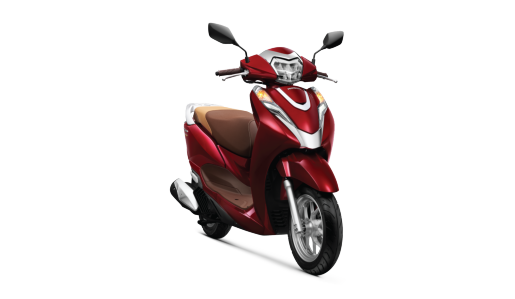

1/1 [==============================] - 0s 125ms/step
Dự đoán: [[0.16462277 0.8353773 ]]
Giá trị dự đoán: Xe máy
Vi phạm


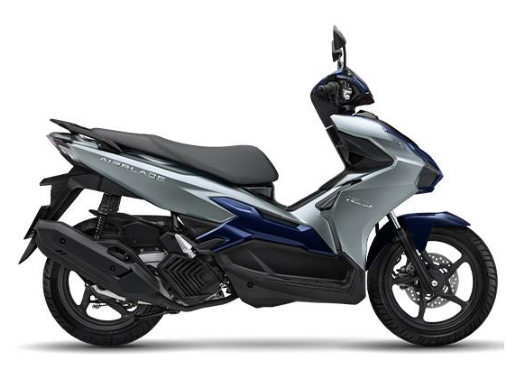

1/1 [==============================] - 0s 139ms/step
Dự đoán: [[0.32959554 0.67040443]]
Giá trị dự đoán: Xe máy
Vi phạm


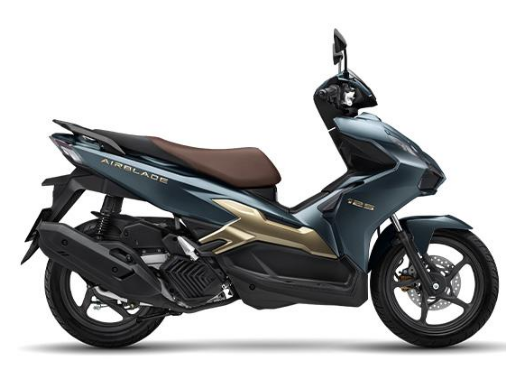

1/1 [==============================] - 0s 126ms/step
Dự đoán: [[0.3201445 0.6798555]]
Giá trị dự đoán: Xe máy
Vi phạm


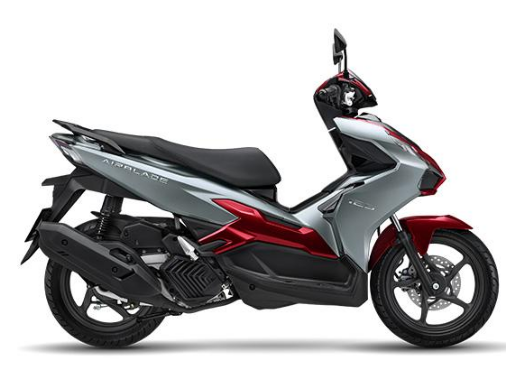

1/1 [==============================] - 0s 148ms/step
Dự đoán: [[0.49401438 0.5059856 ]]
Giá trị dự đoán: Xe máy
Vi phạm


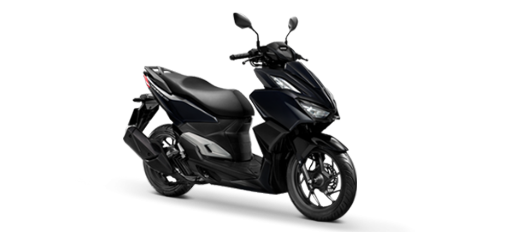

1/1 [==============================] - 0s 87ms/step
Dự đoán: [[0.16752924 0.8324708 ]]
Giá trị dự đoán: Xe máy
Vi phạm


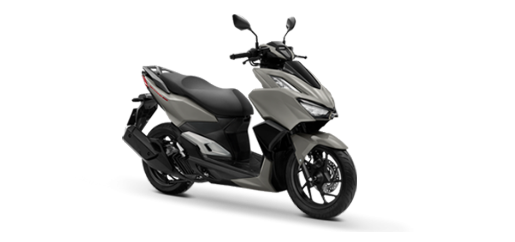

1/1 [==============================] - 0s 88ms/step
Dự đoán: [[0.37096986 0.62903005]]
Giá trị dự đoán: Xe máy
Vi phạm


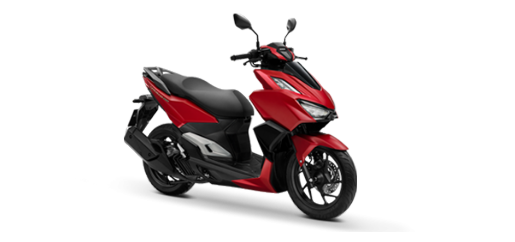

1/1 [==============================] - 0s 90ms/step
Dự đoán: [[0.3199395  0.68006057]]
Giá trị dự đoán: Xe máy
Vi phạm


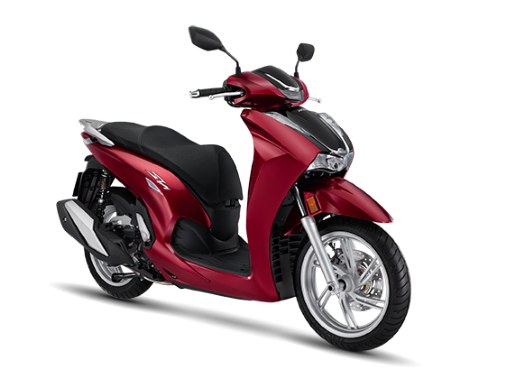

1/1 [==============================] - 0s 102ms/step
Dự đoán: [[0.01987357 0.98012644]]
Giá trị dự đoán: Xe máy
Vi phạm


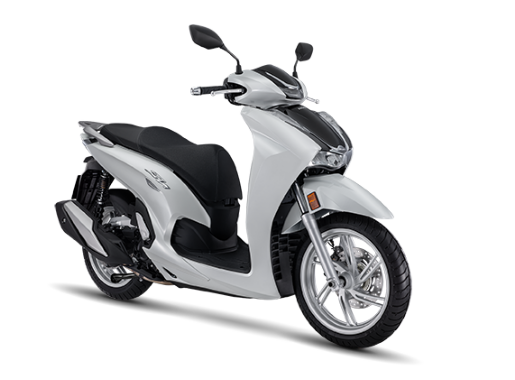

1/1 [==============================] - 0s 96ms/step
Dự đoán: [[0.08826045 0.9117395 ]]
Giá trị dự đoán: Xe máy
Vi phạm


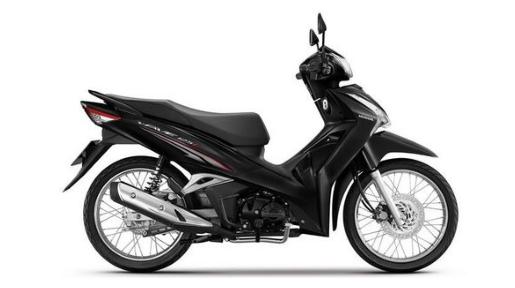

1/1 [==============================] - 0s 91ms/step
Dự đoán: [[0.00754447 0.9924555 ]]
Giá trị dự đoán: Xe máy
Vi phạm


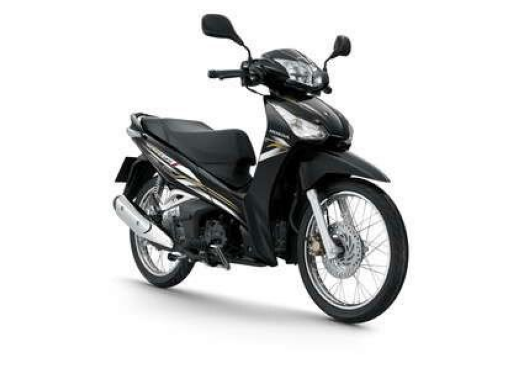

1/1 [==============================] - 0s 102ms/step
Dự đoán: [[0.00479362 0.9952063 ]]
Giá trị dự đoán: Xe máy
Vi phạm


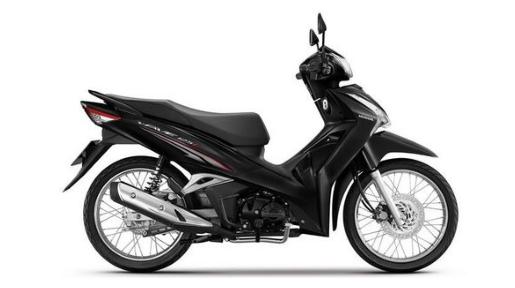

1/1 [==============================] - 0s 110ms/step
Dự đoán: [[0.00754447 0.9924555 ]]
Giá trị dự đoán: Xe máy
Vi phạm


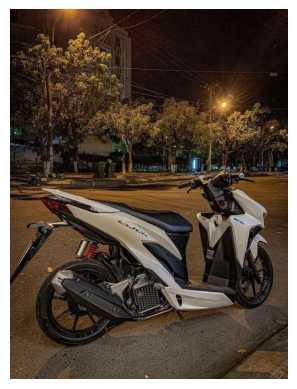

1/1 [==============================] - 0s 95ms/step
Dự đoán: [[0.9875217  0.01247829]]
Giá trị dự đoán: Ô tô
Không vi phạm


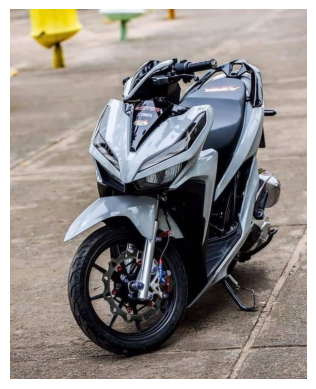

1/1 [==============================] - 0s 100ms/step
Dự đoán: [[0.81719685 0.18280315]]
Giá trị dự đoán: Ô tô
Không vi phạm


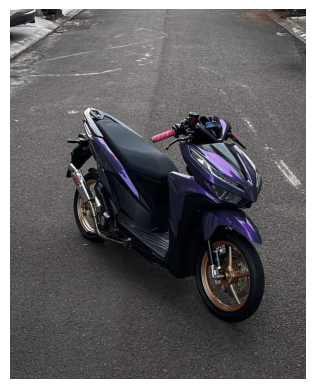

1/1 [==============================] - 0s 121ms/step
Dự đoán: [[0.4008465 0.5991535]]
Giá trị dự đoán: Xe máy
Vi phạm


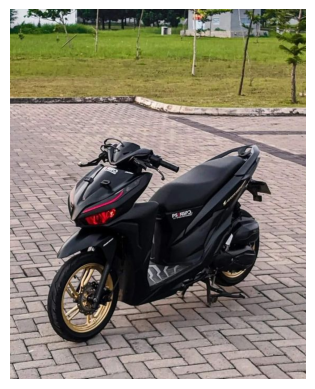

1/1 [==============================] - 0s 133ms/step
Dự đoán: [[0.15088509 0.8491149 ]]
Giá trị dự đoán: Xe máy
Vi phạm


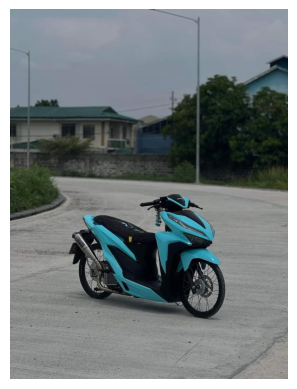

1/1 [==============================] - 0s 111ms/step
Dự đoán: [[0.8557419  0.14425808]]
Giá trị dự đoán: Ô tô
Không vi phạm


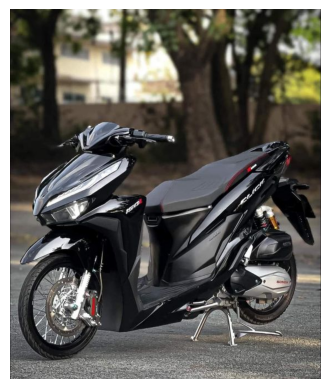

1/1 [==============================] - 0s 116ms/step
Dự đoán: [[0.1116356 0.8883644]]
Giá trị dự đoán: Xe máy
Vi phạm


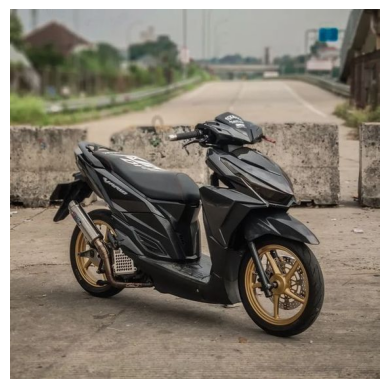

1/1 [==============================] - 0s 137ms/step
Dự đoán: [[0.4787606 0.5212394]]
Giá trị dự đoán: Xe máy
Vi phạm


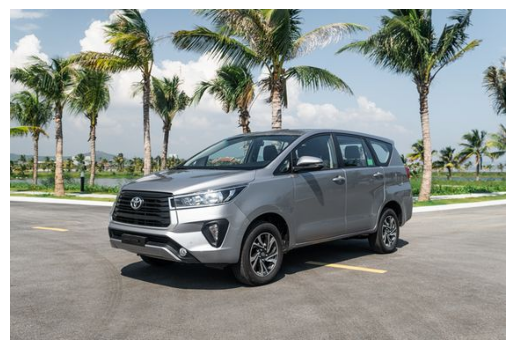

1/1 [==============================] - 0s 157ms/step
Dự đoán: [[0.9445395  0.05546053]]
Giá trị dự đoán: Ô tô
Không vi phạm


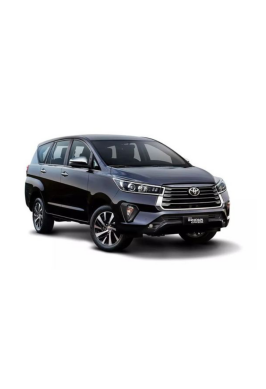

1/1 [==============================] - 0s 116ms/step
Dự đoán: [[0.17979589 0.82020414]]
Giá trị dự đoán: Xe máy
Vi phạm


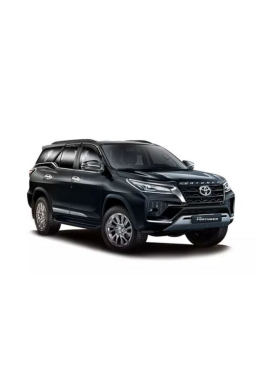

1/1 [==============================] - 0s 116ms/step
Dự đoán: [[0.30662075 0.6933793 ]]
Giá trị dự đoán: Xe máy
Vi phạm


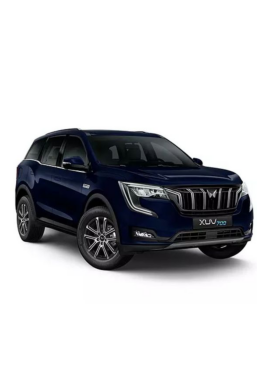

1/1 [==============================] - 0s 125ms/step
Dự đoán: [[0.5062081 0.4937919]]
Giá trị dự đoán: Ô tô
Không vi phạm


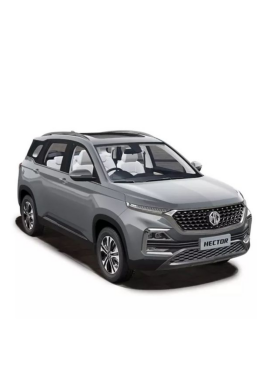

1/1 [==============================] - 0s 118ms/step
Dự đoán: [[0.8941774  0.10582265]]
Giá trị dự đoán: Ô tô
Không vi phạm


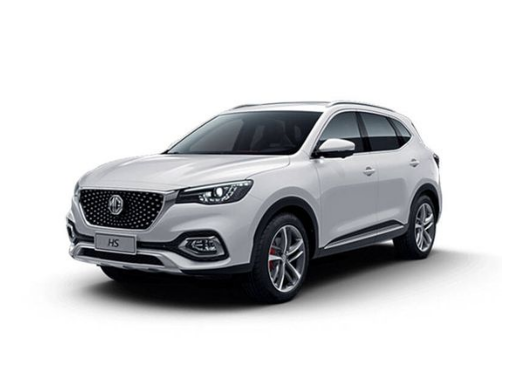

1/1 [==============================] - 0s 116ms/step
Dự đoán: [[0.952617   0.04738298]]
Giá trị dự đoán: Ô tô
Không vi phạm


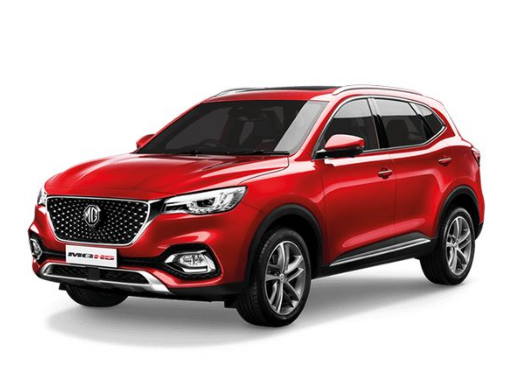

1/1 [==============================] - 0s 116ms/step
Dự đoán: [[9.994635e-01 5.365141e-04]]
Giá trị dự đoán: Ô tô
Không vi phạm


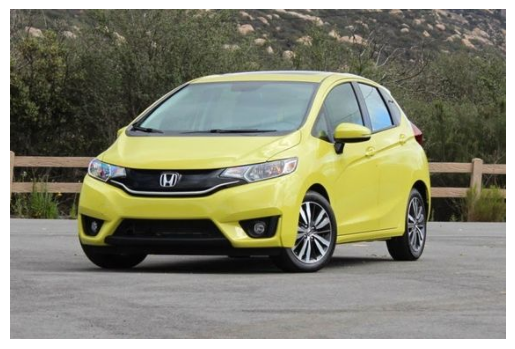

1/1 [==============================] - 0s 135ms/step
Dự đoán: [[0.99448675 0.00551327]]
Giá trị dự đoán: Ô tô
Không vi phạm


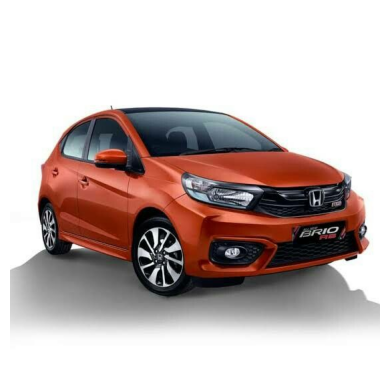

1/1 [==============================] - 0s 170ms/step
Dự đoán: [[0.98936874 0.01063126]]
Giá trị dự đoán: Ô tô
Không vi phạm


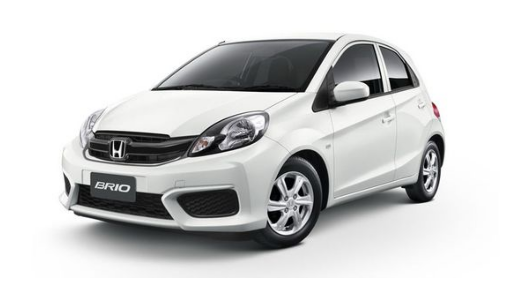

1/1 [==============================] - 0s 125ms/step
Dự đoán: [[0.98755777 0.01244227]]
Giá trị dự đoán: Ô tô
Không vi phạm


In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

uploaded = files.upload()
label = ['Ô tô', 'Xe máy']
for fn in uploaded.keys():
    path = '/content/' + fn
    # Hiển thị hình ảnh
    plt.imshow(mpimg.imread(path))
    plt.axis('off')  # Tắt hiển thị trục
    plt.show()

    # Tải và xử lý hình ảnh
    img = image.load_img(path, target_size=(256, 256))  # Đảm bảo kích thước phù hợp với mô hình
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Chuẩn hóa hình ảnh giống như trong ImageDataGenerator

    # Dự đoán với mô hình
    y_predict = model.predict(x)
    print('Dự đoán:', y_predict)

    predicted_label = label[np.argmax(y_predict)]
    print('Giá trị dự đoán:', predicted_label)

    if predicted_label == 'Ô tô':
        print('Không vi phạm')
    else:
        print('Vi phạm')


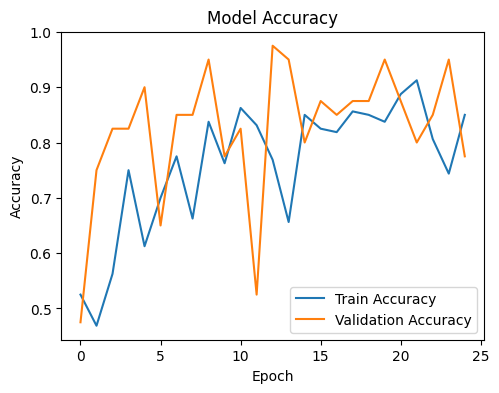

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ lịch sử huấn luyện
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Train Loss: 0.32247212529182434
Train Accuracy: 0.8500000238418579
Validation Loss: 0.5288498401641846
Validation Accuracy: 0.7749999761581421


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=valid_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

# F1 Score, Precision, Recall
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

2/2 [==============================] - 3s 480ms/step
Confusion Matrix:
[[10 11]
 [13  6]]
Classification Report:
              precision    recall  f1-score   support

      Ô tô       0.43      0.48      0.45        21
     Xe máy       0.35      0.32      0.33        19

    accuracy                           0.40        40
   macro avg       0.39      0.40      0.39        40
weighted avg       0.40      0.40      0.40        40

F1 Score: 0.3969696969696969
Precision: 0.39590792838874683
Recall: 0.4


Cải tiến

In [ ]:
from keras.layers import Dropout

# Khởi tạo mô hình
model = Sequential()

# Thêm các lớp CNN
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Thêm các lớp ẩn với dropout sau các lớp ẩn để giảm overfitting
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Thêm dropout với tỷ lệ là 0.5
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Thêm dropout với tỷ lệ là 0.3

# Lớp ra
model.add(Dense(2, activation='softmax'))

# Compile mô hình với optimizer RMSprop và learning rate là 0.001
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Huấn luyện mô hình với các siêu tham số mới
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Đánh giá mô hình trên tập dữ liệu huấn luyện và tập validation
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(valid_generator)

# Tạo dự đoán từ mô hình
predictions = model.predict(valid_generator)

# Tính toán Confusion Matrix và Classification Report
from sklearn.metrics import confusion_matrix, classification_report
y_true = valid_generator.classes
y_pred = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán F1-score, Precision và Recall
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# In các kết quả
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/50
5/5 [==============================] - 35s 6s/step - loss: 8.4978 - accuracy: 0.4812 - val_loss: 0.6594 - val_accuracy: 0.5750
Epoch 2/50
5/5 [==============================] - 36s 7s/step - loss: 0.7022 - accuracy: 0.5125 - val_loss: 0.7019 - val_accuracy: 0.5250
Epoch 3/50
5/5 [==============================] - 34s 6s/step - loss: 0.6184 - accuracy: 0.7000 - val_loss: 0.5356 - val_accuracy: 0.7750
Epoch 4/50
5/5 [==============================] - 31s 6s/step - loss: 0.7776 - accuracy: 0.6000 - val_loss: 0.5738 - val_accuracy: 0.8000
Epoch 5/50
5/5 [==============================] - 33s 7s/step - loss: 0.6191 - accuracy: 0.6625 - val_loss: 0.4320 - val_accuracy: 0.9750
Epoch 6/50
5/5 [==============================] - 34s 7s/step - loss: 0.5722 - accuracy: 0.7312 - val_loss: 3.3992 - val_accuracy: 0.4750
Epoch 7/50
5/5 [==============================] - 32s 6s/step - loss: 0.9736 - accuracy: 0.7188 - val_loss: 0.5122 - val_accuracy: 0.7750
Epoch 8/50
5/5 [==================

Train Loss tăng nhẹ nhưng Train Accuracy tăng lên, cho thấy mô hình sau khi cải tiến có hiệu suất tốt hơn trên tập huấn luyện.
Validation Loss giảm đáng kể và Validation Accuracy tăng đáng kể sau khi cải tiến, cho thấy mô hình có khả năng tổng quát hóa tốt hơn trên dữ liệu mới.
Mô hình sau khi cải tiến có khả năng phân loại tốt hơn giữa các lớp.
F1 Score, Precision và Recall đều tăng lên, cho thấy mô hình đã cải thiện đáng kể sau khi điều chỉnh.
==> Mô hình sau khi cải tiến có hiệu suất tốt hơn so với mô hình ban đầu trên cả tập huấn luyện và tập validation.